In [ ]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

from plotting_tools import *

load_dotenv()
CACHE = os.getenv("CACHE")

In [1]:
R_VALUES_PATH = os.path.join(CACHE, 'bootstrap_r_values')
MULTIPLIER = 36

def load_and_prepare_data(model_name, multiplier, region):
    all_data = []
    filepath = os.path.join(R_VALUES_PATH, model_name + '_' + region + '.pkl')
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
    df['model'] = model_name
    df['features'] = df['features'].apply(lambda x: int(x) * multiplier)
    df['score'] = df['score'].astype(np.float32)
    return df

/data/shared/miniconda3/envs/bonnerlab/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/shared/miniconda3/envs/bonnerlab/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: IT, for naturalscenes: ventral visual stream

In [5]:
# loading linear model data
df = load_and_prepare_data('non_linearity', MULTIPLIER, region)

/tmp/ipykernel_276989/3279238802.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x = df['nl_type'],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


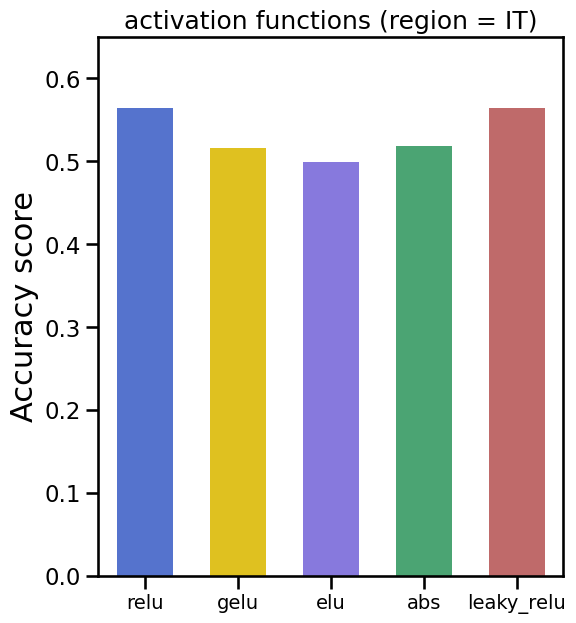

In [7]:
sns.set_context(context='talk')    
plt.rcParams['figure.figsize'] = (6,7)

palette = {         
    'relu':'royalblue',
    'leaky_relu':'indianred',
    'gelu':'gold',
    'elu':'mediumslateblue',
    'abs':'mediumseagreen',
    'None':'gray'
}

ax1 = sns.barplot(x = df['nl_type'], 
                  y = df['score'], 
                       palette=palette,
                       width=0.6, 
                       dodge=False)            
    
ax1.legend().remove()
plt.xlabel('')
plt.ylabel(size=22, ylabel='Accuracy score')    
plt.xticks(size=14)
plt.title('activation functions (region = IT)')
plt.ylim(0,0.65) if region == 'IT' else plt.ylim(0,0.25)
plt.savefig(f'manuscript_figures/figure_s2_{DATASET}_{region}.png', dpi=200) 
plt.show()